In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

In [27]:
np.random.seed(0)
tf.random.set_seed(0)

In [28]:
df = pd.read_csv( 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [29]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [30]:
num_fraud = (df['Class'] == 1).sum()
num_normal = (df['Class'] == 0).sum()
num_total = num_fraud + num_normal
num_total, f'{num_fraud / num_total * 100:.3f}%', f'{num_normal / num_total * 100:.3f}%'

(284807, '0.173%', '99.827%')

In [31]:
df['Time'] = df['Time'].apply(lambda sec: sec / 3600 % 24)
df['Amount'] = np.log(df['Amount'] + 1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.570980,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.249987,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.232366,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.397895,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], 
                                                    test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [33]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [34]:
y_train.value_counts() / y_train.count()

Class
0    0.998251
1    0.001749
Name: count, dtype: float64

In [35]:
y_test.value_counts() / y_test.count()

Class
0    0.998294
1    0.001706
Name: count, dtype: float64

In [36]:
input_layer = Input(shape=(30, ))
encoded_all = Dense(12, activation='relu')(input_layer)
decoded_all = Dense(30)(encoded_all)

encoder_all = Model(input_layer, encoded_all)
autoencoder_all = Model(input_layer, decoded_all)

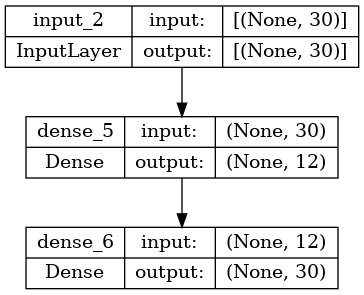

In [37]:
plot_model(autoencoder_all, show_shapes=True)

In [38]:
autoencoder_all.compile(optimizer='adam', loss='mse')
history = autoencoder_all.fit(
    X_train,
    X_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_test, X_test)
)

Epoch 1/30
1113/1113 [==============================] - 8s 6ms/step - loss: 0.7624 - val_loss: 0.6065
Epoch 2/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5898 - val_loss: 0.5605
Epoch 3/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5669 - val_loss: 0.5558
Epoch 4/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5635 - val_loss: 0.5539
Epoch 5/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5621 - val_loss: 0.5542
Epoch 6/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5613 - val_loss: 0.5545
Epoch 7/30
1113/1113 [==============================] - 6s 6ms/step - loss: 0.5606 - val_loss: 0.5550
Epoch 8/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5600 - val_loss: 0.5553
Epoch 9/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.5592 - val_loss: 0.5564
Epoch 10/30
1113/1113 [==============================] - 7s 6ms/step - loss: 0.558

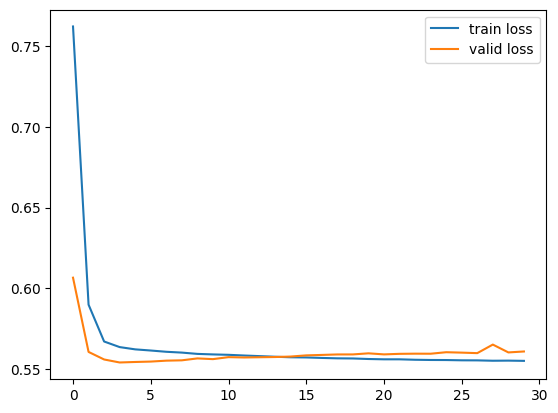

In [39]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()

In [40]:
enc_all = encoder_all.predict(X_train)
enc_all.shape

4451/4451 [==============================] - 7s 2ms/step


(142403, 12)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model_svc = SVC()
model_knn = KNeighborsClassifier(n_neighbors=3)

In [42]:
model_svc.fit(enc_all, y_train)

SVC()

In [43]:
model_knn.fit(enc_all, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# %%time
predicted_svc = model_svc.predict(encoder_all.predict(X_test))

4451/4451 [==============================] - 7s 2ms/step


In [45]:
# %%time
predicted_knn = model_knn.predict(encoder_all.predict(X_test))

4451/4451 [==============================] - 7s 2ms/step


In [46]:
model_dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', 
                            input_shape=(enc_all.shape[-1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model_dnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = 'binary_crossentropy', metrics=['accuracy']
)

In [47]:
enc_test = encoder_all.predict(X_test)

4451/4451 [==============================] - 7s 2ms/step


In [48]:
history = model_dnn.fit(enc_all, y_train, epochs=50, batch_size=1024, 
                    validation_data=(enc_test, y_test))

Epoch 1/50
140/140 [==============================] - 3s 9ms/step - loss: 0.2151 - accuracy: 0.9239 - val_loss: 0.0349 - val_accuracy: 0.9983
Epoch 2/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0438 - accuracy: 0.9983 - val_loss: 0.0283 - val_accuracy: 0.9983
Epoch 3/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0342 - accuracy: 0.9982 - val_loss: 0.0199 - val_accuracy: 0.9983
Epoch 4/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0229 - accuracy: 0.9983 - val_loss: 0.0089 - val_accuracy: 0.9986
Epoch 5/50
140/140 [==============================] - 1s 9ms/step - loss: 0.0147 - accuracy: 0.9985 - val_loss: 0.0075 - val_accuracy: 0.9990
Epoch 6/50
140/140 [==============================] - 1s 9ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0075 - val_accuracy: 0.9991
Epoch 7/50
140/140 [==============================] - 1s 9ms/step - loss: 0.0109 - accuracy: 0.9988 - val_loss: 0.0074 - val_accuracy: 0.9991
Epoch 

In [49]:
predicted_dnn = model_dnn.predict(encoder_all.predict(X_test)) > 0.5

4451/4451 [==============================] - 8s 2ms/step


Precision 0.93
Recall 0.66


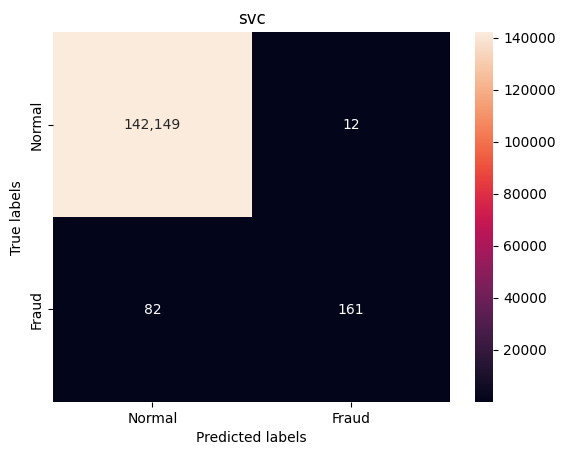

Precision 0.90
Recall 0.72


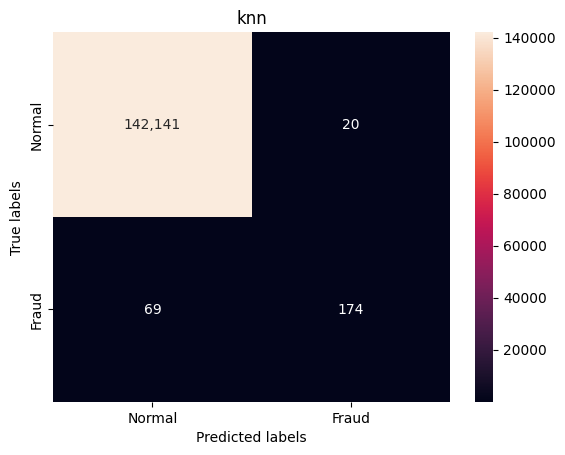

Precision 0.86
Recall 0.72


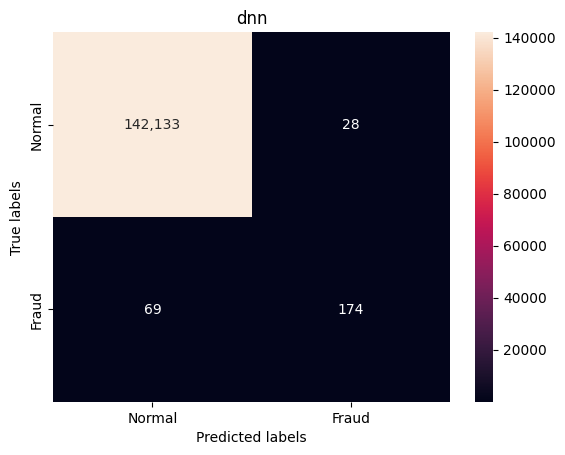

In [50]:
for model, predicted in [("svc", predicted_svc), ("knn", predicted_knn), ("dnn", predicted_dnn)]:    
    print("Precision {:.2f}".format(precision_score(y_test, predicted)))
    print("Recall {:.2f}".format(recall_score(y_test, predicted)))    
    cm = confusion_matrix(y_test, predicted)
    ax = sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel('Predicted labels'); 
    ax.set_ylabel('True labels')
    ax.set_title(model); 
    ax.xaxis.set_ticklabels(['Normal', 'Fraud'])
    ax.yaxis.set_ticklabels(['Normal', 'Fraud'])
    ax.set(yticks=[0.5, 1.5], xticks=[0.5, 1.5])
    plt.show()